# Assignment 2

This assignment serves as a comprehensive evaluation of your machine learning skills, encompassing not only the technical aspects of model development but also your ability to analyze, interpret, and present data insights effectively. As such, it's essential to ensure that your submission is complete, functional, and devoid of any obvious gaps, as if you were delivering this project to a client.

To achieve this, leverage the full capabilities of Markdown and the interactive visualization tools available in Jupyter notebooks to craft a well-structured and visually appealing report of your findings. Your report should clearly communicate the insights you've gained from the exploratory data analysis, the rationale behind your data preprocessing and feature engineering decisions, and a thorough analysis of feature importance. High-quality visualizations and well-organized documentation will not only support your analysis but also make your results more accessible and understandable to your audience.

Remember, the ability to present complex results in an intuitive and engaging manner is a crucial skill, almost as important as the technical proficiency in model building and data analysis. Treat this assignment as an opportunity to showcase your skills in both areas.

## Instructions
- Your submission should be a `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. It should include the answers to the questions in markdown cells, your data analysis and results.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell. [Academic misconduct policy](https://wiki.innopolis.university/display/DOE/Academic+misconduct+policy)
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions and decisions.

## Self-Reliance and Exploration
In this task, you're encouraged to rely on your resourcefulness and creativity. Dive into available resources, experiment with various solutions, and learn from every outcome. While our team is here to clarify task details and offer conceptual guidance, we encourage you to first seek answers independently. This approach is vital for developing your problem-solving skills in machine learning.



# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (50%)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more about Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/)


## What You Need to Do
In this task, you are required to employ a fully connected feed-forward Artificial Neural Network (ANN) to tackle a classification problem. This involves several key steps, each critical to the development and performance of your model:

- **Exploratory Data Analysis (EDA) (10%)**: Begin by conducting a thorough exploratory analysis of the provided dataset. Your goal here is to uncover patterns, anomalies, relationships, or trends that could influence your modeling decisions. **Share the insights** you gather from this process and explain how they informed your subsequent steps.
  
- **Data Preprocessing and Feature Engineering (10%)**: Based on your EDA insights, choose and implement the most appropriate data preprocessing steps and feature engineering techniques. This may include handling missing values, encoding categorical variables, normalizing data, and creating new features that could enhance your model's ability to learn from the data.
  
- **Model Design and Training (10%)**: Design a fully connected feed-forward ANN model. You will need to experiment with different architectures, layer configurations, and hyperparameters to find the most effective solution for the classification problem at hand.

- **Feature Importance Analysis (10%)**: After developing your model, analyze which features are most important for making predictions. Discuss how this analysis aligns with your initial EDA insights and what it reveals about the characteristics most indicative of specific user behaviors or identities.

- **Evaluation (10%)**: You will be required to submit your model prediction on a hidden data set.

### Data
You will be using the data in `Task_1.json` to identify Waldo (`user_id=0`). The dataset includes:
- **"browser", "os" and "locale"**: Information about the software used.
- **"user_id"**: A unique identifier for each user.
- **"location"**: Geolocation based on the IP address used.
- **"sites"**: A list of visited URLs and the time spent there in seconds.
- **"time" and "date"**: When the session started in GMT.


### Evaluation
After training, evaluate your model by printing the classification report on your test set. Then, predict whether each user in `task_1_verify.json` is Waldo or not, by adding the boolean `is_waldo` property to the `task_1_verify.json`:

```diff
  [
    {
+     "is_waldo": false,
      "browser": "Chrome",
      "os": "Debian",
      "locale": "ur-PK",
      "location": "Russia/Moscow",
      "sites": [
          // ...
      ],
      "time": "04:12:00",
      "date":"2017-06-29"
    }
    // ...
  ]

```

## Learning Objectives

- **Exploratory Data Analysis**: Apply suitable analysis techniques to gain insights and better understand the dataset.
- **Classification Approach**: Identify the most appropriate method for the given problem.
- **Data Preprocessing**: Select and execute proper preprocessing and encoding techniques.
- **Model Implementation**: Utilize ANNs to address a classification problem, including training, validation, and testing phases.
- **Feature Importance Analysis**: Determine and report which features are most critical for the model's predictions to uncover insights into specific user behaviors.

## Name: Evgeny Bobkunov


## Mail: e.bobkunov@innopolis.university


## Group: SD-03

# Exploratory Data Analysis

Here we can use some analytical skills, detective/OSINT experience, and extreme intelligence to identify patterns and regularities in Waldo's behavior.
My TA Vladimir Bazilevich, cited anime and manga series "Death Note" in the task description, so we can use the same approach as the Detective L used to find Kira.
During the research on topic, I was inspired by [this video](https://www.youtube.com/watch?v=OPU48KxCsKY&ab_channel=Everlong)


 Let's start by loading the data and looking at the first few rows.

## Read data
Let's start by reading given dataset

In [1]:
import pandas as pd

# Read the data from the json file
train_data = pd.read_json('task_1_train_data.json')

# Print the first 5 rows of the training data
print(train_data.head())

   browser         os locale  user_id           location  \
0   Chrome     Debian  ur-PK      116      Russia/Moscow   
1  Firefox  Windows 8  uk-UA      155       France/Paris   
2   Safari      MacOS  fr-FR       39        Japan/Tokyo   
3   Chrome  Windows 8  nl-NL      175   Australia/Sydney   
4  Firefox     Ubuntu  ro-RO       50  USA/San Francisco   

                                               sites      time       date  
0  [{'site': 'bing.net', 'length': 52}, {'site': ...  04:12:00 2017-06-29  
1  [{'site': 'yahoo.com', 'length': 46}, {'site':...  03:57:00 2016-03-23  
2            [{'site': 'oracle.com', 'length': 335}]  05:26:00 2016-11-17  
3  [{'site': 'mail.google.com', 'length': 192}, {...  00:05:00 2016-08-23  
4  [{'site': 'mail.google.com', 'length': 266}, {...  22:55:00 2016-07-23  


## Collect information about Waldo
Now, let's collect some information about Waldo

In [2]:
print("Ratio of Waldo's user data to all data:")
print(train_data[train_data['user_id'] == 0].shape[0] / train_data.shape[0])

# Print data with user_id equal to 0
print(train_data[train_data['user_id'] == 0])

Ratio of Waldo's user data to all data:
0.005
       browser          os locale  user_id        location  \
95     Firefox      Ubuntu  ru_RU        0     USA/Chicago   
254    Firefox  Windows 10  ru_RU        0    France/Paris   
292     Chrome  Windows 10  ru_RU        0     USA/Chicago   
366     Chrome  Windows 10  ru_RU        0    France/Paris   
435     Chrome  Windows 10  ru_RU        0    France/Paris   
...        ...         ...    ...      ...             ...   
39073   Chrome      Ubuntu  ru_RU        0     USA/Chicago   
39231   Chrome      Ubuntu  ru_RU        0  Canada/Toronto   
39450   Chrome      Ubuntu  ru_RU        0     USA/Chicago   
39893  Firefox      Ubuntu  ru_RU        0  Canada/Toronto   
39934  Firefox      Ubuntu  ru_RU        0     USA/Chicago   

                                                   sites      time       date  
95     [{'site': 'mail.google.com', 'length': 75}, {'...  02:47:00 2016-11-05  
254    [{'site': 'lenta.ru', 'length': 43}, {'sit

We see that, Waldo presents in only 0.005% of the data. This is a highly imbalanced dataset.

### List of Waldo's data

In [3]:
# Print the list of unique browsers of user_id 0
print(train_data[train_data['user_id'] == 0]['browser'].unique())

# Print the list of unique operating systems of user_id 0
print(train_data[train_data['user_id'] == 0]['os'].unique())

# Print the list of unique locale of user_id 0
print(train_data[train_data['user_id'] == 0]['locale'].unique())

# Print the list of unique locations of user_id 0
print(train_data[train_data['user_id'] == 0]['location'].unique())

['Firefox' 'Chrome']
['Ubuntu' 'Windows 10']
['ru_RU']
['USA/Chicago' 'France/Paris' 'Canada/Toronto']


Interesting, Waldo uses only two browsers, two operating systems, only Russian locale and three locations. This means we can narrow it down considerably.
He might used virtual machine or VPNs to hide his location. Free VPNs usually have limited locations, so we can assume that he had only three locations available.
Also Firefox is a default browser for Ubuntu. We can use this analysis further for our model.

### Analyzing time of internet activity

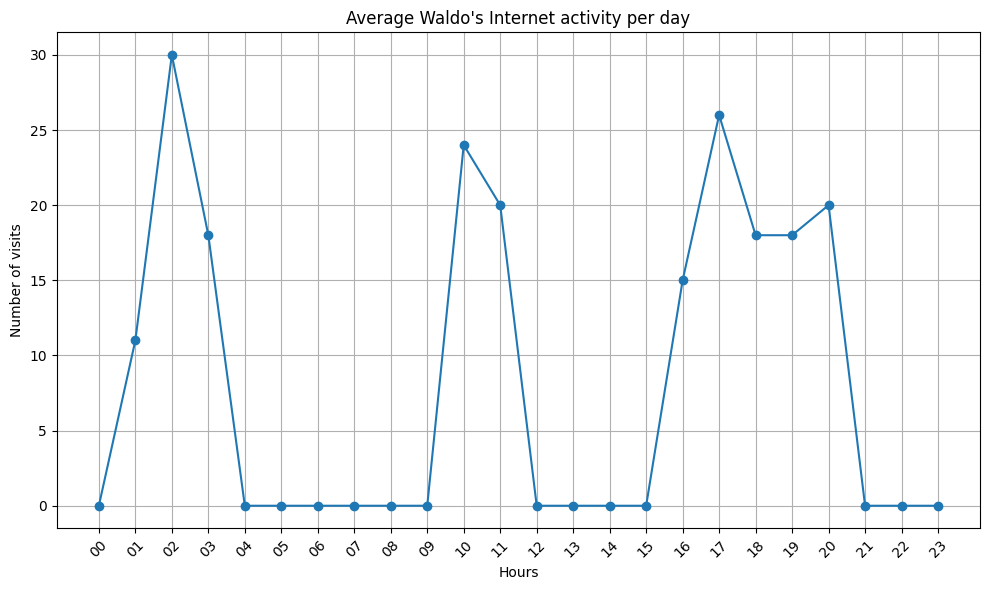

In [4]:
import matplotlib.pyplot as plt

visits = (train_data[train_data['user_id'] == 0]['time'])

visits_hours = [visit[:2] for visit in visits]

hourly_visits = {str(hour).zfill(2): 0 for hour in range(24)}

for hour in visits_hours:
    hourly_visits[hour] += 1

hours = list(hourly_visits.keys())
visits_count = list(hourly_visits.values())

plt.figure(figsize=(10, 6))
plt.plot(hours, visits_count, marker='o')
plt.title('Average Waldo\'s Internet activity per day')
plt.xlabel('Hours')
plt.ylabel('Number of visits')
plt.xticks(range(24))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

By looking at the plot, we see that Waldo is active during concrete hours. I can make an assumption, that he wakes up at 9:00, browses the internet for a while, then goes to work or attends classes, and then comes back home and browses the internet again for a long time. After that, he starts to prepare for sleep: eats dinner, takes shower, cleans teeth, and goes to bed. After some time, he wakes up and browses the internet again. (Maybe he visits some porn sites during the deep night or doing ML assignments T.T) Then, he falls asleep till the morning.

### Analyzing date of internet activity by days of the week

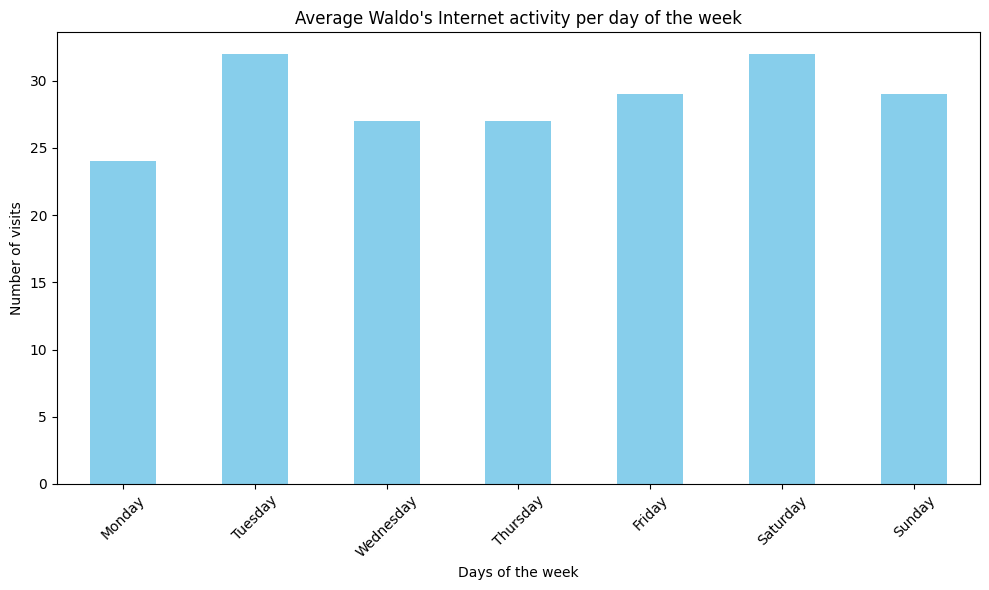

In [5]:
days = pd.DataFrame(train_data[train_data['user_id'] == 0]['date'])

days['date'] = pd.to_datetime(train_data['date'])

days['weekday'] = days['date'].dt.day_name()

weekday_activity = days.groupby('weekday').size()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
weekday_activity.reindex(days_order).plot(kind='bar', color='skyblue')
plt.title('Average Waldo\'s Internet activity per day of the week')
plt.xlabel('Days of the week')
plt.ylabel('Number of visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It looks balanced enough, so we can't make any assumptions based on this plot. Anyway it's good to know that Waldo is active every day of the week.

In [6]:
# Print number of combinations of browser and os of user_id 0
print(train_data[train_data['user_id'] == 0].groupby(['browser', 'os']).size())

browser  os        
Chrome   Ubuntu        58
         Windows 10    41
Firefox  Ubuntu        54
         Windows 10    47
dtype: int64


Waldo uses both Ubuntu and Windows 10 / Chrome and Firefox almost equally.

### Analyzing sites visited by Waldo

In [7]:
# Print the list of unique sites of user_id 0
print(set(train_data[train_data['user_id'] == 0]['sites'].apply(lambda x: [site['site'] for site in x]).sum()))

sites_lengths = train_data[train_data['user_id'] == 0]['sites'].apply(lambda x: [length['length'] for length in x]).sum()
print(sites_lengths)
print('Waldo visited', len(sites_lengths), 'sites')
print('Waldo spent minimum', min(sites_lengths), 'seconds on site')
print('Waldo spent maximum', max(sites_lengths), 'seconds on site')
average_time = sum(sites_lengths) / len(sites_lengths)
print('In average Waldo spent {:.2f} seconds on site'.format(average_time))




{'3suisses.fr', 'ebsco.com', '96.110', 'neoncactuswines.com', 'pilgrimapp.com', 'keil.com', 'gqmagazine.fr', 'sourabhsoni.com', 'nintendolesite.com', 'mylittlefarmies.de', 'cryptocointalk.com', 'swfhostltd.com', 'surlatoile.org', 'videogamereviewerkid.com', 'toptal.com', 'tennistemple.com', 'logitheque.com', 'cdn-videodesk.com', 'dlpdomain.com', 'viki.io', 'score-qi.com', 'woodbrass.com', 'buzzly.fr', 'free.fr', 'telerik.com', 'sosh.fr', 'ioam.de', 'media-imdb.com', 'learningtree.fr', 'com.mx', 'bookryanair.com', 'english-ch.com', 'educationau-incanada.ca', 'framepool.com', 'atos.net', 'cartezero.fr', 'hostwinds.com', 'svalbard.fr', 'about.com', 'dalealplay.com', 'carbase.info', 'univ-paris13.fr', 'dharwadker.org', 'gravatar.com', 'apimath.fr', 'exclusive-networks.it', 'webterren.com', 'dondusang.net', 'nextag.fr', 'nethebergement.com', 'boosterforum.com', 'jchr.be', 'ac-clermont.fr', 'kotaku.com', 'lyrics.com', 'pixelbell.com', 'amazon.fr', 'ekladata.com', 'rts.ch', 'abaenglish.com', 

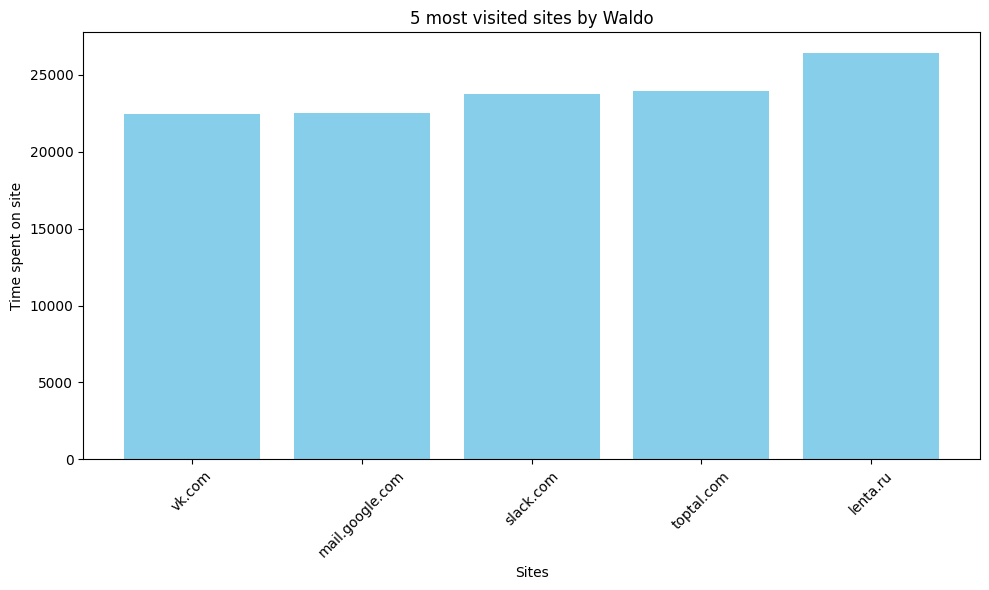

In [8]:
sites = train_data[train_data['user_id'] == 0]['sites'].apply(lambda x: [site['site'] for site in x]).sum()
sites_lengths = train_data[train_data['user_id'] == 0]['sites'].apply(lambda x: [length['length'] for length in x]).sum()

sites_dict = {site: 0 for site in sites}

for site, length in zip(sites, sites_lengths):
    sites_dict[site] += length

sites_dict = dict(sorted(sites_dict.items(), key=lambda item: item[1]))

most_visited_sites = list(sites_dict.keys())[-5:]
most_visited_sites_lengths = [sites_dict[site] for site in most_visited_sites]

plt.figure(figsize=(10, 6))
plt.bar(most_visited_sites, most_visited_sites_lengths, color='skyblue')
plt.title('5 most visited sites by Waldo')
plt.xlabel('Sites')
plt.ylabel('Time spent on site')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data Preprocessing and Feature Engineering

There are too many sites in the dataset. We cannot encode all sites from all users. So let's just drop this column.

In [9]:
# Sum the lengths of all sites
train_data['total_time'] = train_data['sites'].apply(lambda x: sum([site['length'] for site in x]))

# Drop sites column
train_data.drop('sites', axis=1, inplace=True)

In [10]:
# Check for missing values
print(train_data.isnull().sum())

browser       0
os            0
locale        0
user_id       0
location      0
time          0
date          0
total_time    0
dtype: int64


In [11]:
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['weekday'] = train_data['date'].dt.weekday

train_data['hour'] = pd.to_datetime(train_data['time']).dt.hour
train_data['minute'] = pd.to_datetime(train_data['time']).dt.minute

train_data.drop(['date', 'time'], axis=1, inplace=True)

# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['browser', 'os', 'locale', 'location'])

train_data['is_waldo'] = train_data['user_id'] == 0
train_data.drop('user_id', axis=1, inplace=True)

print(train_data.head())


C:\Users\eugen\AppData\Local\Temp\ipykernel_22636\3917661494.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['hour'] = pd.to_datetime(train_data['time']).dt.hour
C:\Users\eugen\AppData\Local\Temp\ipykernel_22636\3917661494.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['minute'] = pd.to_datetime(train_data['time']).dt.minute


   total_time  year  month  weekday  hour  minute  browser_Chrome  \
0         849  2017      6        3     4      12            True   
1        1201  2016      3        2     3      57           False   
2         335  2016     11        3     5      26           False   
3         505  2016      8        1     0       5            True   
4        1206  2016      7        5    22      55           False   

   browser_Firefox  browser_Internet Explorer  browser_Safari  ...  \
0            False                      False           False  ...   
1             True                      False           False  ...   
2            False                      False            True  ...   
3            False                      False           False  ...   
4             True                      False           False  ...   

   location_New Zealand/Auckland  location_Russia/Moscow  \
0                          False                    True   
1                          False            

In [12]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_data = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)

print(train_data.head())

   total_time  year     month   weekday      hour    minute  browser_Chrome  \
0    0.246373   1.0  0.454545  0.500000  0.173913  0.203390             1.0   
1    0.348520   0.0  0.181818  0.333333  0.130435  0.966102             0.0   
2    0.097214   0.0  0.909091  0.500000  0.217391  0.440678             0.0   
3    0.146547   0.0  0.636364  0.166667  0.000000  0.084746             1.0   
4    0.349971   0.0  0.545455  0.833333  0.956522  0.932203             0.0   

   browser_Firefox  browser_Internet Explorer  browser_Safari  ...  \
0              0.0                        0.0             0.0  ...   
1              1.0                        0.0             0.0  ...   
2              0.0                        0.0             1.0  ...   
3              0.0                        0.0             0.0  ...   
4              1.0                        0.0             0.0  ...   

   location_New Zealand/Auckland  location_Russia/Moscow  \
0                            0.0            

In [13]:
# Split the data into features and target
X = train_data.drop('is_waldo', axis=1) # Features 
y = train_data['is_waldo'] # Target 

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


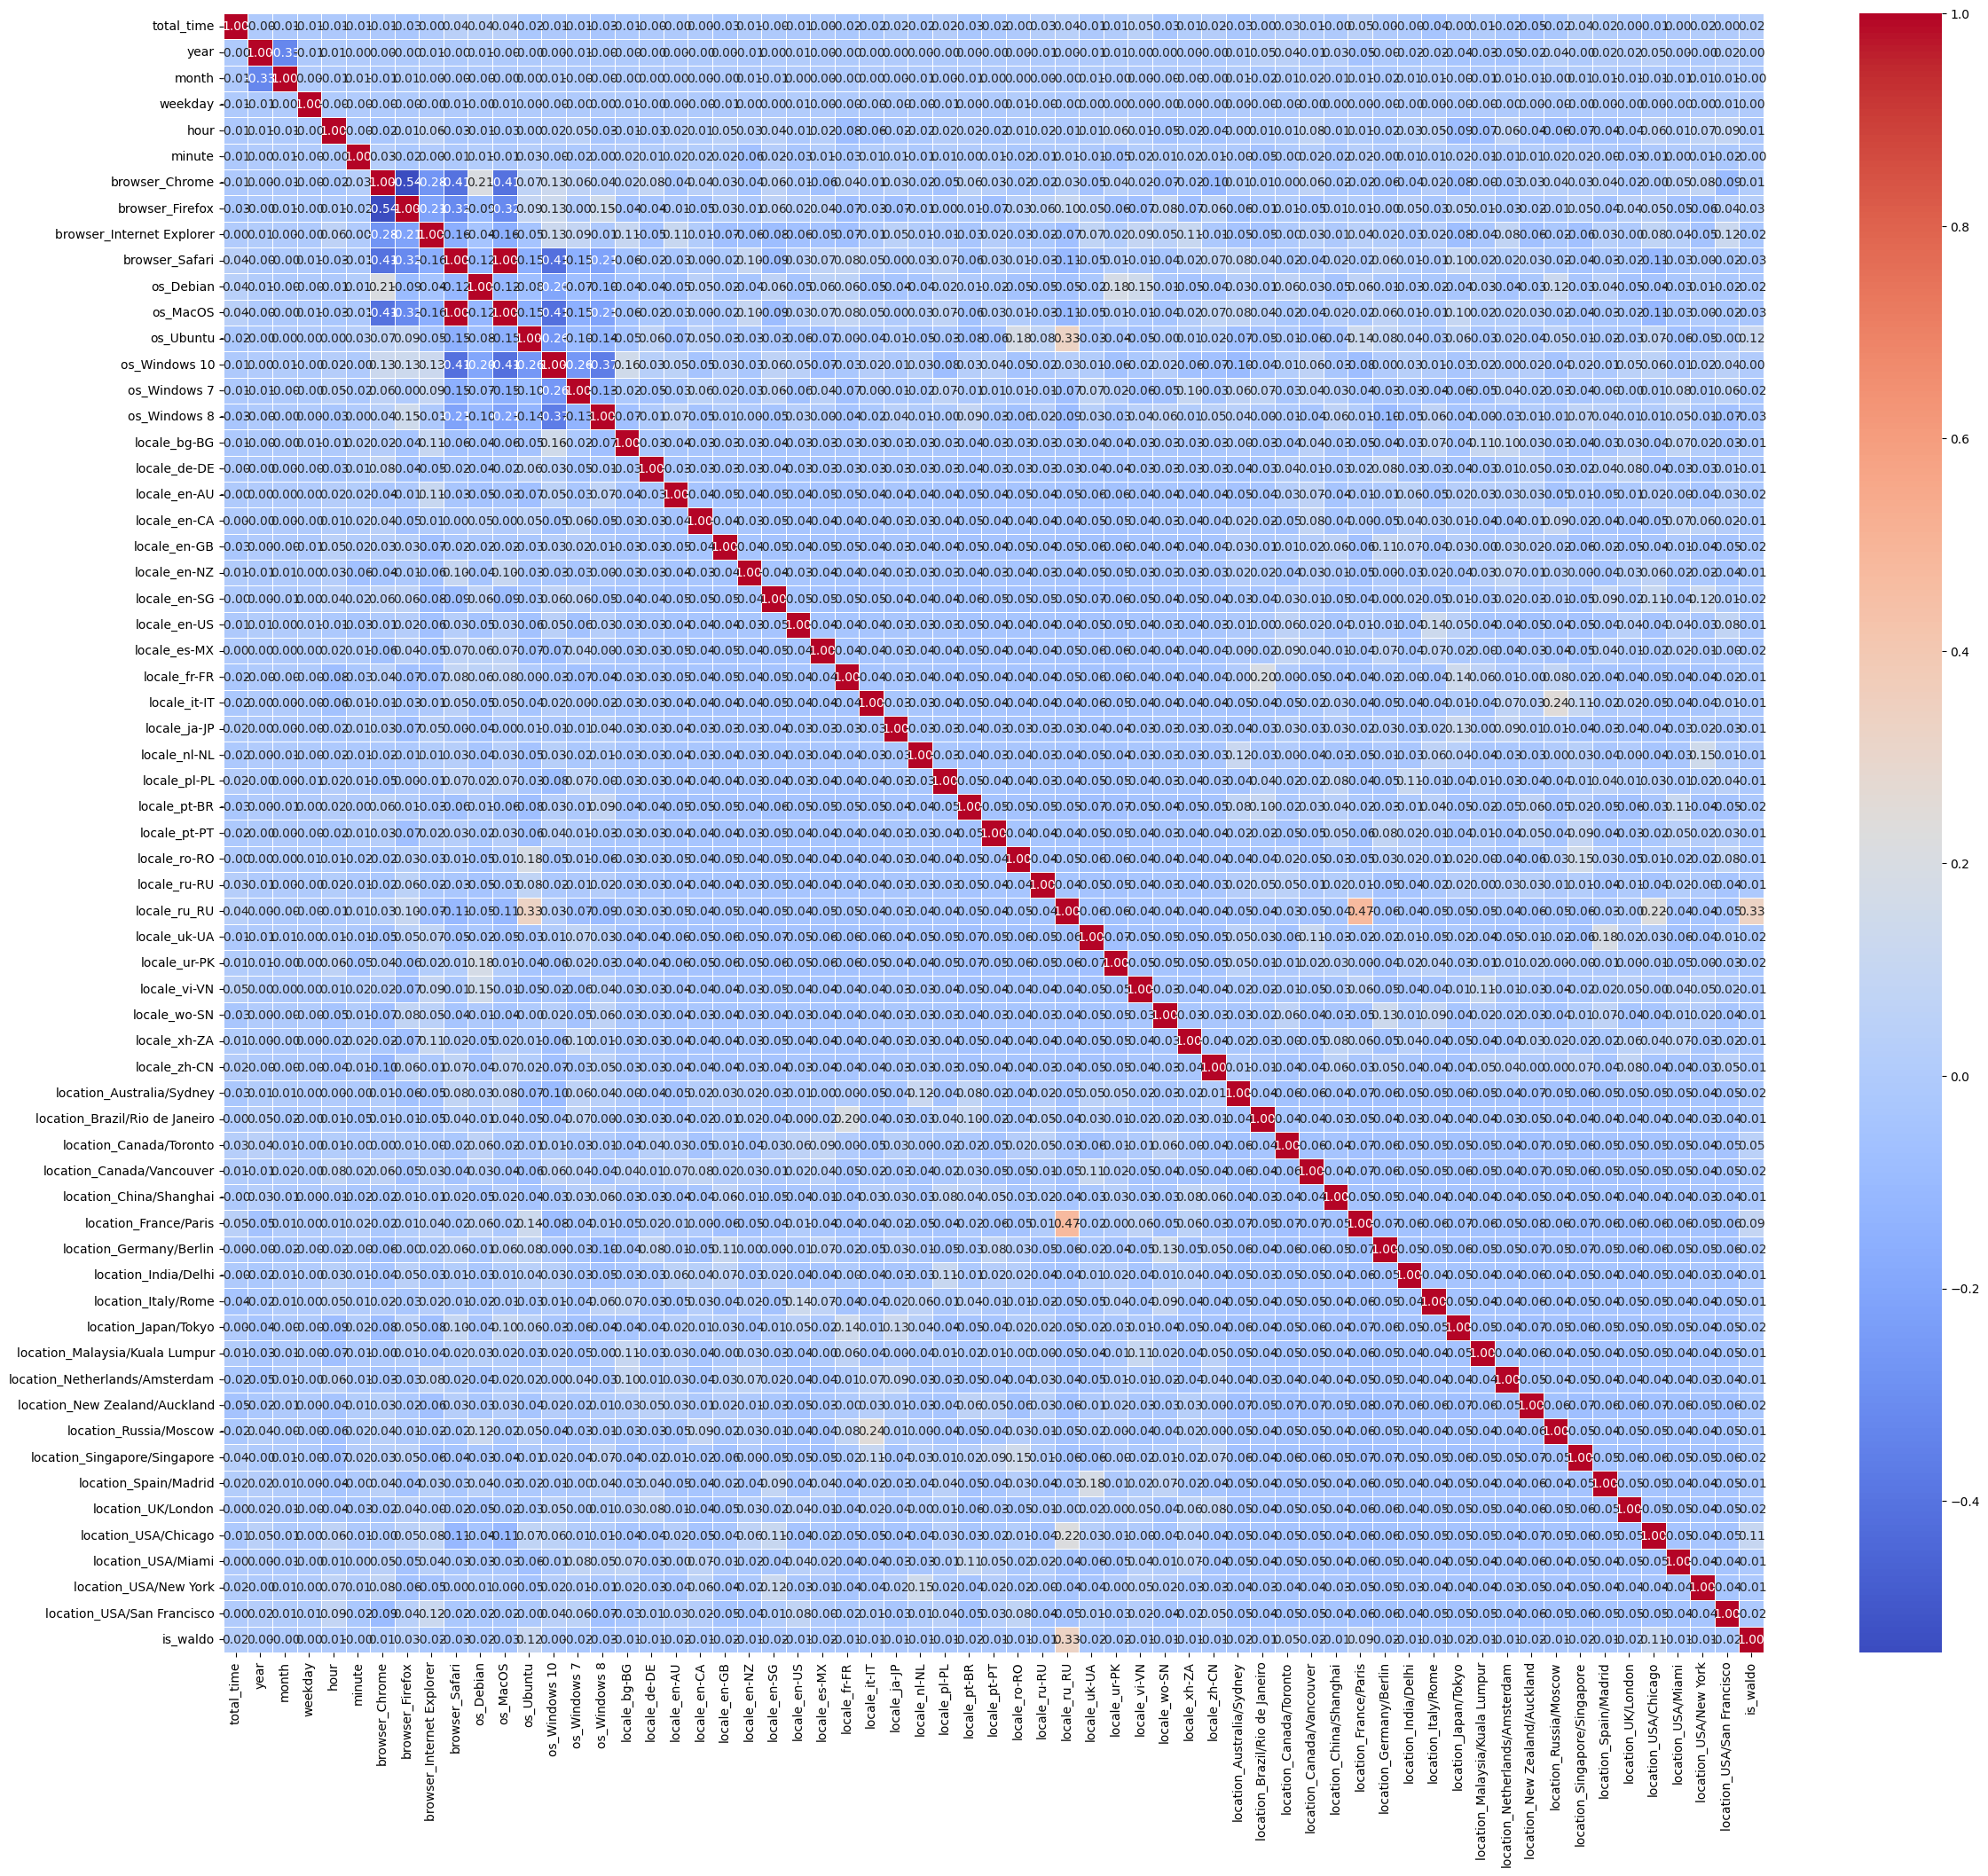

In [14]:
# Correlation matrix
import seaborn as sns

plt.figure(figsize=(28, 24))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()



# Model Design and Training

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32)

c:\Users\eugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,385 (64.00 KB)

 Trainable params: 16,385 (64.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9784 - loss: 0.0793 - val_accuracy: 0.9955 - val_loss: 0.0130
Epoch 2/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9947 - loss: 0.0159 - val_accuracy: 0.9955 - val_loss: 0.0113
Epoch 3/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9950 - loss: 0.0138 - val_accuracy: 0.9956 - val_loss: 0.0112
Epoch 4/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9954 - loss: 0.0128 - val_accuracy: 0.9970 - val_loss: 0.0106
Epoch 5/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9953 - loss: 0.0136 - val_accuracy: 0.9969 - val_loss: 0.0096
Epoch 6/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.9967 - val_loss: 0.0092
Epoch 7/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9954 - loss: 0.0125 - val_accuracy: 0.9970 - val_loss: 0.0095
Epoch 8/200
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9955 - loss: 0

In [16]:
#  Print F1 score, precision, and recall for the model
from sklearn.metrics import classification_report

y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)

print(classification_report(y_val, y_pred))


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7964
         1.0       0.89      0.47      0.62        36

    accuracy                           1.00      8000
   macro avg       0.95      0.74      0.81      8000
weighted avg       1.00      1.00      1.00      8000



# Feature Importance Analysis

In [17]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


c:\Users\eugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 32001it [25:17, 21.01it/s]                           


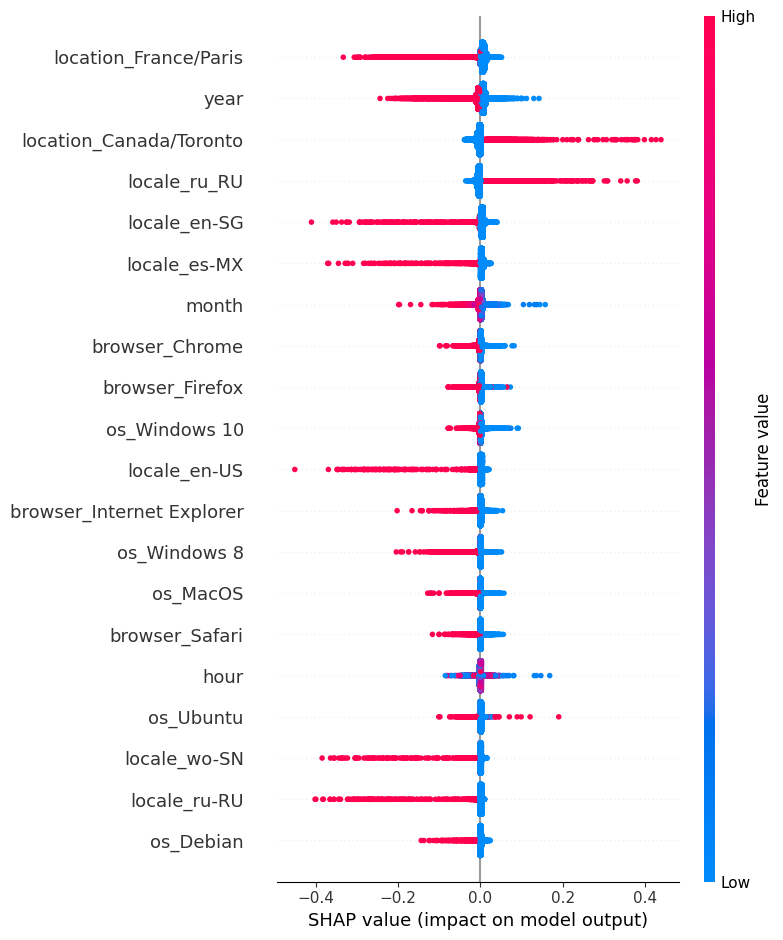

In [18]:
import numpy as np
import shap

# Create an explainer object
explainer = shap.Explainer(model, X_train)

# Calculate Shapley values
shap_values = explainer.shap_values(X_train)

# Visualize feature importance
shap.summary_plot(shap_values, X_train)


As we expected in the EDA part, ru_RU location has significant impact on the model. 

# Evaluation

In [19]:
verification_data = pd.read_json('task_1_verify.json')
waldo_data = pd.read_json('task_1_verify.json')

verification_data['total_time'] = verification_data['sites'].apply(lambda x: sum([site['length'] for site in x]))

verification_data.drop('sites', axis=1, inplace=True)

verification_data['user_id'] = 1

verification_data['year'] = verification_data['date'].dt.year
verification_data['month'] = verification_data['date'].dt.month
verification_data['weekday'] = verification_data['date'].dt.weekday

verification_data['hour'] = pd.to_datetime(verification_data['time']).dt.hour
verification_data['minute'] = pd.to_datetime(verification_data['time']).dt.minute

verification_data.drop(['date', 'time'], axis=1, inplace=True)

# Encode categorical variables
verification_data = pd.get_dummies(verification_data, columns=['browser', 'os', 'locale', 'location'])

verification_data['is_waldo'] = False
verification_data.drop('user_id', axis=1, inplace=True)

# Normalize the data
verification_data = pd.DataFrame(scaler.transform(verification_data), columns=verification_data.columns)

# Drop is_waldo
verification_data.drop('is_waldo', axis=1, inplace=True)

# Predict is_waldo 
verification_data['is_waldo'] = model.predict(verification_data) > 0.5
waldo_data['is_waldo'] = False
waldo_data['is_waldo'] = verification_data['is_waldo']

# Save the results to a json file
waldo_data.to_json('task_1_verify.json', orient='records')

print(waldo_data.head())





C:\Users\eugen\AppData\Local\Temp\ipykernel_22636\2515311450.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  verification_data['hour'] = pd.to_datetime(verification_data['time']).dt.hour
C:\Users\eugen\AppData\Local\Temp\ipykernel_22636\2515311450.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  verification_data['minute'] = pd.to_datetime(verification_data['time']).dt.minute


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step
             browser          os locale             location  \
0  Internet Explorer   Windows 8  xh-ZA         France/Paris   
1             Chrome  Windows 10  ja-JP       Germany/Berlin   
2             Chrome  Windows 10  it-IT  Singapore/Singapore   
3             Chrome  Windows 10  ur-PK            UK/London   
4            Firefox      Ubuntu  en-CA        Russia/Moscow   

                                               sites      time       date  \
0  [{'site': 'baidu.com', 'length': 201}, {'site'...  14:13:00 2016-11-05   
1  [{'site': 'toptal.com', 'length': 96}, {'site'...  21:06:00 2017-02-22   
2  [{'site': 'bing.net', 'length': 225}, {'site':...  13:17:00 2016-01-30   
3  [{'site': 'google.com', 'length': 113}, {'site...  17:00:00 2017-02-27   
4  [{'site': 'googleapis.com', 'length': 243}, {'...  18:11:00 2017-04-19   

   is_waldo  
0     False  
1     False  
2     False  
3     False  
4     False  


In [20]:
# Count how many waldos in verification data
print(verification_data[verification_data['is_waldo'] == True].shape[0])

78
